In [170]:
import torch
from torch import nn
import matplotlib.pyplot as plt

torch.__version__

'2.2.2'

In [171]:
weight = 0.3
bias = 0.9

start = 0
end = 1
step = 0.01

X = torch.arange(start, end, step).unsqueeze(dim=1)
y = weight * X + bias

X[:20], y[:20]

(tensor([[0.0000],
         [0.0100],
         [0.0200],
         [0.0300],
         [0.0400],
         [0.0500],
         [0.0600],
         [0.0700],
         [0.0800],
         [0.0900],
         [0.1000],
         [0.1100],
         [0.1200],
         [0.1300],
         [0.1400],
         [0.1500],
         [0.1600],
         [0.1700],
         [0.1800],
         [0.1900]]),
 tensor([[0.9000],
         [0.9030],
         [0.9060],
         [0.9090],
         [0.9120],
         [0.9150],
         [0.9180],
         [0.9210],
         [0.9240],
         [0.9270],
         [0.9300],
         [0.9330],
         [0.9360],
         [0.9390],
         [0.9420],
         [0.9450],
         [0.9480],
         [0.9510],
         [0.9540],
         [0.9570]]))

In [172]:
split_train = int(0.8 * len(X))
X_train, y_train = X[:split_train], y[:split_train]
X_test, y_test = X[split_train:], y[split_train:]

len(X_train), len(y_train), len(X_test), len(y_test)

(80, 80, 20, 20)

In [173]:
def plot_predictions(train_data=X_train,
                     train_labels=y_train,
                     test_data=X_test,
                     test_labels=y_test,
                     predictions=None):
    plt.figure(figsize=(10, 7))

    plt.scatter(train_data, train_labels, c="b", s=4, label="Training Data")

    plt.scatter(test_data, test_labels, c="r", s=6, label="Testing Data")

    if predictions is not None:
        plt.scatter(test_data, predictions, c="g", s=4, label="Predictions")
    
    plt.legend(prop={"size": 14})

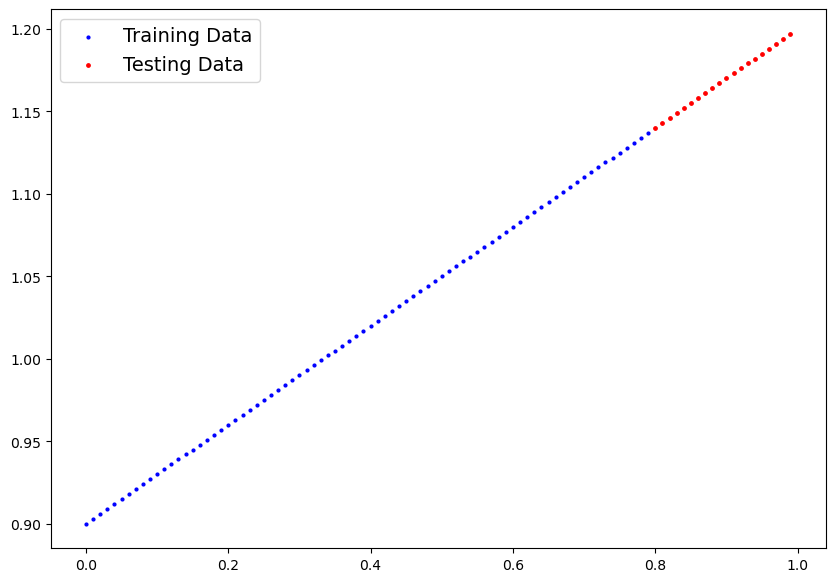

In [174]:
plot_predictions()

In [175]:
class LinearRegressionModel(nn.Module):
    def __init__(self):
        super().__init__()

        self.weights = nn.Parameter(torch.randn(1, dtype=torch.float), requires_grad=True)
        self.bias = nn.Parameter(torch.randn(1, dtype=torch.float), requires_grad=True)

    def forward(self, x: torch.Tensor) -> torch.Tensor:
        return self.weights * x + self.bias


In [176]:
torch.manual_seed(42)

ex_model_0 = LinearRegressionModel()

list(ex_model_0.parameters())

[Parameter containing:
 tensor([0.3367], requires_grad=True),
 Parameter containing:
 tensor([0.1288], requires_grad=True)]

In [177]:
ex_model_0.state_dict()

OrderedDict([('weights', tensor([0.3367])), ('bias', tensor([0.1288]))])

In [178]:
loss_fn = nn.L1Loss()

optimizer = torch.optim.SGD(params=ex_model_0.parameters(), lr=0.01)

In [179]:
torch.manual_seed(42)
epochs = 300

train_loss_values = []
test_loss_values = []
epoch_count = []

for epoch in range(epochs):
    ex_model_0.train()

    y_pred = ex_model_0(X_train)

    loss = loss_fn(y_pred, y_train)

    optimizer.zero_grad()

    loss.backward()

    optimizer.step()

    ex_model_0.eval()

    with torch.inference_mode():
        test_pred = ex_model_0(X_test)

        test_loss = loss_fn(test_pred, y_test.type(torch.float))

        if epoch % 20 == 0:
            epoch_count.append(epoch)
            train_loss_values.append(loss.detach().numpy())
            test_loss_values.append(test_loss.detach().numpy())
            print(f"Epoch: {epoch} | MAE Train Loss: {loss} | MAE Test Loss: {test_loss}")


Epoch: 0 | MAE Train Loss: 0.7566978335380554 | MAE Test Loss: 0.7248174548149109
Epoch: 20 | MAE Train Loss: 0.5254928469657898 | MAE Test Loss: 0.4541124403476715
Epoch: 40 | MAE Train Loss: 0.2942880392074585 | MAE Test Loss: 0.18340764939785004
Epoch: 60 | MAE Train Loss: 0.07658576965332031 | MAE Test Loss: 0.07274086028337479
Epoch: 80 | MAE Train Loss: 0.05255373567342758 | MAE Test Loss: 0.11581540107727051
Epoch: 100 | MAE Train Loss: 0.045542728155851364 | MAE Test Loss: 0.10467890650033951
Epoch: 120 | MAE Train Loss: 0.03868866711854935 | MAE Test Loss: 0.08938358724117279
Epoch: 140 | MAE Train Loss: 0.03183453157544136 | MAE Test Loss: 0.07408786565065384
Epoch: 160 | MAE Train Loss: 0.024982359260320663 | MAE Test Loss: 0.0581042543053627
Epoch: 180 | MAE Train Loss: 0.018130185082554817 | MAE Test Loss: 0.04212062805891037
Epoch: 200 | MAE Train Loss: 0.011278990656137466 | MAE Test Loss: 0.02579306997358799
Epoch: 220 | MAE Train Loss: 0.004429381340742111 | MAE Test L

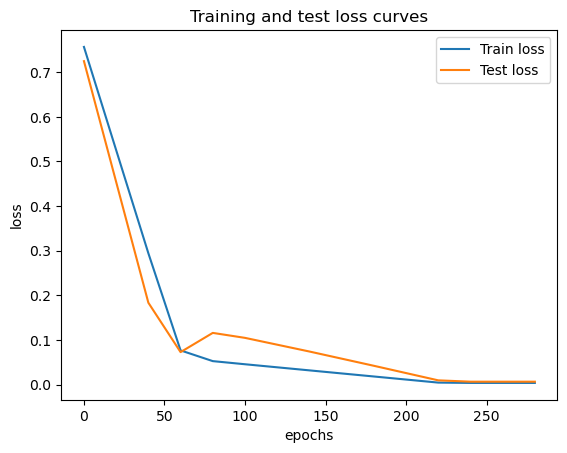

In [180]:
# Plot the loss curves
plt.plot(epoch_count, train_loss_values, label="Train loss")
plt.plot(epoch_count, test_loss_values, label="Test loss")
plt.title("Training and test loss curves")
plt.ylabel("loss")
plt.xlabel("epochs")
plt.legend();

In [181]:
ex_model_0.eval()

with torch.inference_mode():
    y_preds = ex_model_0(X_test)

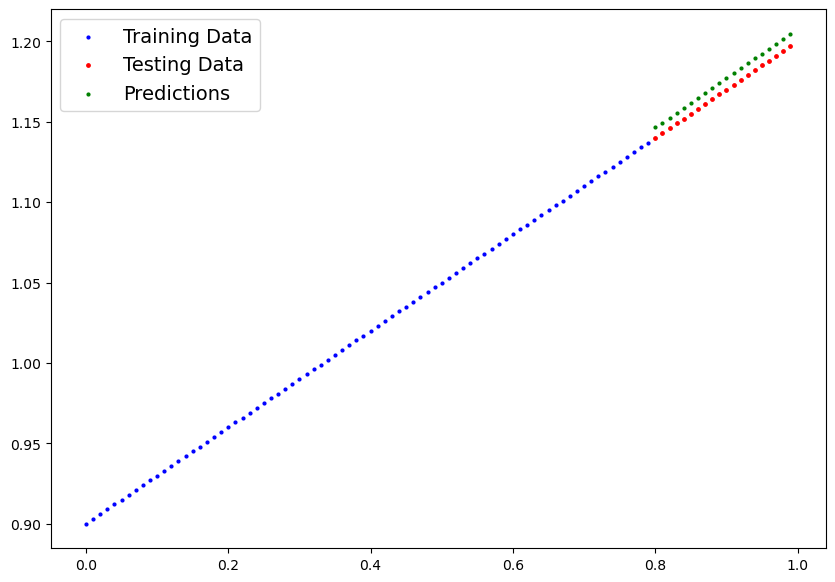

In [182]:
plot_predictions(predictions=y_preds)

In [183]:
from pathlib import Path

MODEL_PATH = Path("models")
MODEL_PATH.mkdir(parents=True, exist_ok=True)

MODEL_NAME = "01_pytorch_exercise_model_0.pth"
MODEL_SAVE_PATH = MODEL_PATH / MODEL_NAME

print(f"Saving model to: {MODEL_SAVE_PATH}")
torch.save(obj=ex_model_0.state_dict(), f=MODEL_SAVE_PATH)

Saving model to: models/01_pytorch_exercise_model_0.pth


In [184]:
!ls -l models/01_pytorch_exercise_model_0.pth

-rw-r--r-- 1 madaghafuri madaghafuri 1680 Apr  3 21:22 models/01_pytorch_exercise_model_0.pth


In [185]:
loaded_model = LinearRegressionModel()

loaded_model.load_state_dict(torch.load(f=MODEL_SAVE_PATH))

<All keys matched successfully>

In [186]:
with torch.inference_mode():
    loaded_model_preds = loaded_model(X_test)

loaded_model_preds == y_preds

tensor([[True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True]])